# Blood donation Prediction 

In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### Loading the dataset

In [4]:
data = pd.read_excel('Blood_donation.xlsx')
data

,Unnamed: 0,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Made Donation in March 2007
0,619,2,50,12500,98,1
1,664,0,13,3250,28,1
2,441,1,16,4000,35,1
3,160,2,20,5000,45,1
4,358,1,24,6000,77,0
...,...,...,...,...,...,...
571,698,23,1,250,23,0
572,433,16,3,750,86,0
573,360,21,2,500,52,0
574,541,39,1,250,39,0


### Basic checks

In [5]:
data.head()

,Unnamed: 0,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Made Donation in March 2007
0,619,2,50,12500,98,1
1,664,0,13,3250,28,1
2,441,1,16,4000,35,1
3,160,2,20,5000,45,1
4,358,1,24,6000,77,0


In [6]:
data.tail()

,Unnamed: 0,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Made Donation in March 2007
571,698,23,1,250,23,0
572,433,16,3,750,86,0
573,360,21,2,500,52,0
574,541,39,1,250,39,0
575,74,72,1,250,72,0


In [7]:
data.shape

(576, 6)

In [8]:
data.columns

Index(['Unnamed: 0', 'Months since Last Donation', 'Number of Donations',
       'Total Volume Donated (c.c.)', 'Months since First Donation',
       'Made Donation in March 2007'],
      dtype='object')

In [9]:
data.rename({'Months since Last Donation':'Months_since_Last_Donation','Number of Donations':'Number_of_Donations','Total Volume Donated (c.c.)':'Total_Volume_Donated_(c.c.)','Months since First Donation':'Months_since_First_Donation','Made Donation in March 2007':'Made_Donation_in_March_2007'},axis = 1, inplace =True)

In [10]:
data

,Unnamed: 0,Months_since_Last_Donation,Number_of_Donations,Total_Volume_Donated_(c.c.),Months_since_First_Donation,Made_Donation_in_March_2007
0,619,2,50,12500,98,1
1,664,0,13,3250,28,1
2,441,1,16,4000,35,1
3,160,2,20,5000,45,1
4,358,1,24,6000,77,0
...,...,...,...,...,...,...
571,698,23,1,250,23,0
572,433,16,3,750,86,0
573,360,21,2,500,52,0
574,541,39,1,250,39,0


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Unnamed: 0                   576 non-null    int64
 1   Months_since_Last_Donation   576 non-null    int64
 2   Number_of_Donations          576 non-null    int64
 3   Total_Volume_Donated_(c.c.)  576 non-null    int64
 4   Months_since_First_Donation  576 non-null    int64
 5   Made_Donation_in_March_2007  576 non-null    int64
dtypes: int64(6)
memory usage: 27.1 KB


In [12]:
data.isnull().sum()

Unnamed: 0                     0
Months_since_Last_Donation     0
Number_of_Donations            0
Total_Volume_Donated_(c.c.)    0
Months_since_First_Donation    0
Made_Donation_in_March_2007    0
dtype: int64

In [13]:
data.describe()

,Unnamed: 0,Months_since_Last_Donation,Number_of_Donations,Total_Volume_Donated_(c.c.),Months_since_First_Donation,Made_Donation_in_March_2007
count,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000
mean,374.034722,9.439236,5.427083,1356.770833,34.050347,0.239583
std,216.947773,8.175454,5.740010,1435.002556,24.227672,0.427200
min,0.000000,0.000000,1.000000,250.000000,2.000000,0.000000
25%,183.750000,2.000000,2.000000,500.000000,16.000000,0.000000
50%,375.500000,7.000000,4.000000,1000.000000,28.000000,0.000000
75%,562.500000,14.000000,7.000000,1750.000000,49.250000,0.000000
max,747.000000,74.000000,50.000000,12500.000000,98.000000,1.000000


In [14]:
data['Made_Donation_in_March_2007'].value_counts()  

Made_Donation_in_March_2007
0    438
1    138
Name: count, dtype: int64

In [15]:
data.drop(['Unnamed: 0'],axis = 1, inplace = True)  # it is same as index number 

### EDA

In [16]:
data

,Months_since_Last_Donation,Number_of_Donations,Total_Volume_Donated_(c.c.),Months_since_First_Donation,Made_Donation_in_March_2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0
...,...,...,...,...,...
571,23,1,250,23,0
572,16,3,750,86,0
573,21,2,500,52,0
574,39,1,250,39,0


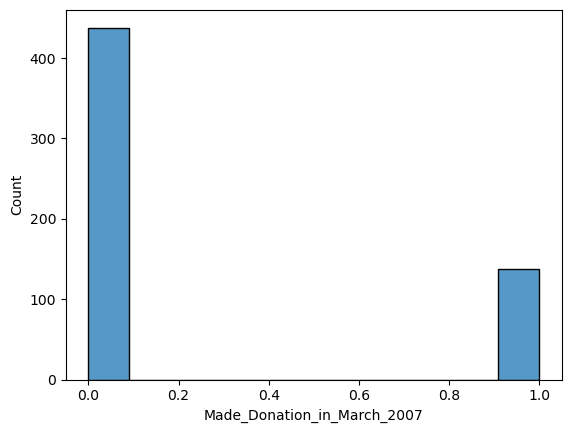

In [17]:
sns.histplot(data['Made_Donation_in_March_2007'])
plt.show()

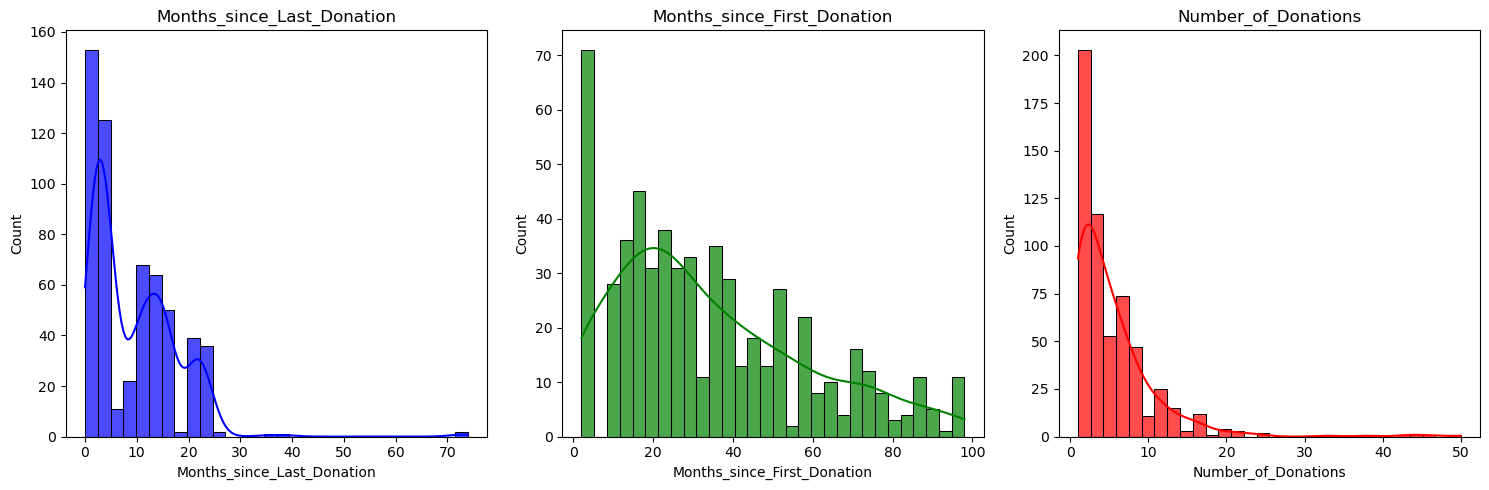

In [18]:
plt.figure(figsize=(15, 5))


plt.subplot(1,3,1)  
sns.histplot(data['Months_since_Last_Donation'], bins=30, color='blue', alpha=0.7,kde = True)
plt.title('Months_since_Last_Donation')


plt.subplot(1,3,2) 
sns.histplot(data['Months_since_First_Donation'], bins=30, color='green', alpha=0.7 ,kde = True )
plt.title('Months_since_First_Donation')


plt.subplot(1,3,3)  
sns.histplot(data['Number_of_Donations'], bins=30, color='red', alpha=0.7, kde = True)
plt.title('Number_of_Donations')
plt.tight_layout()
plt.show()

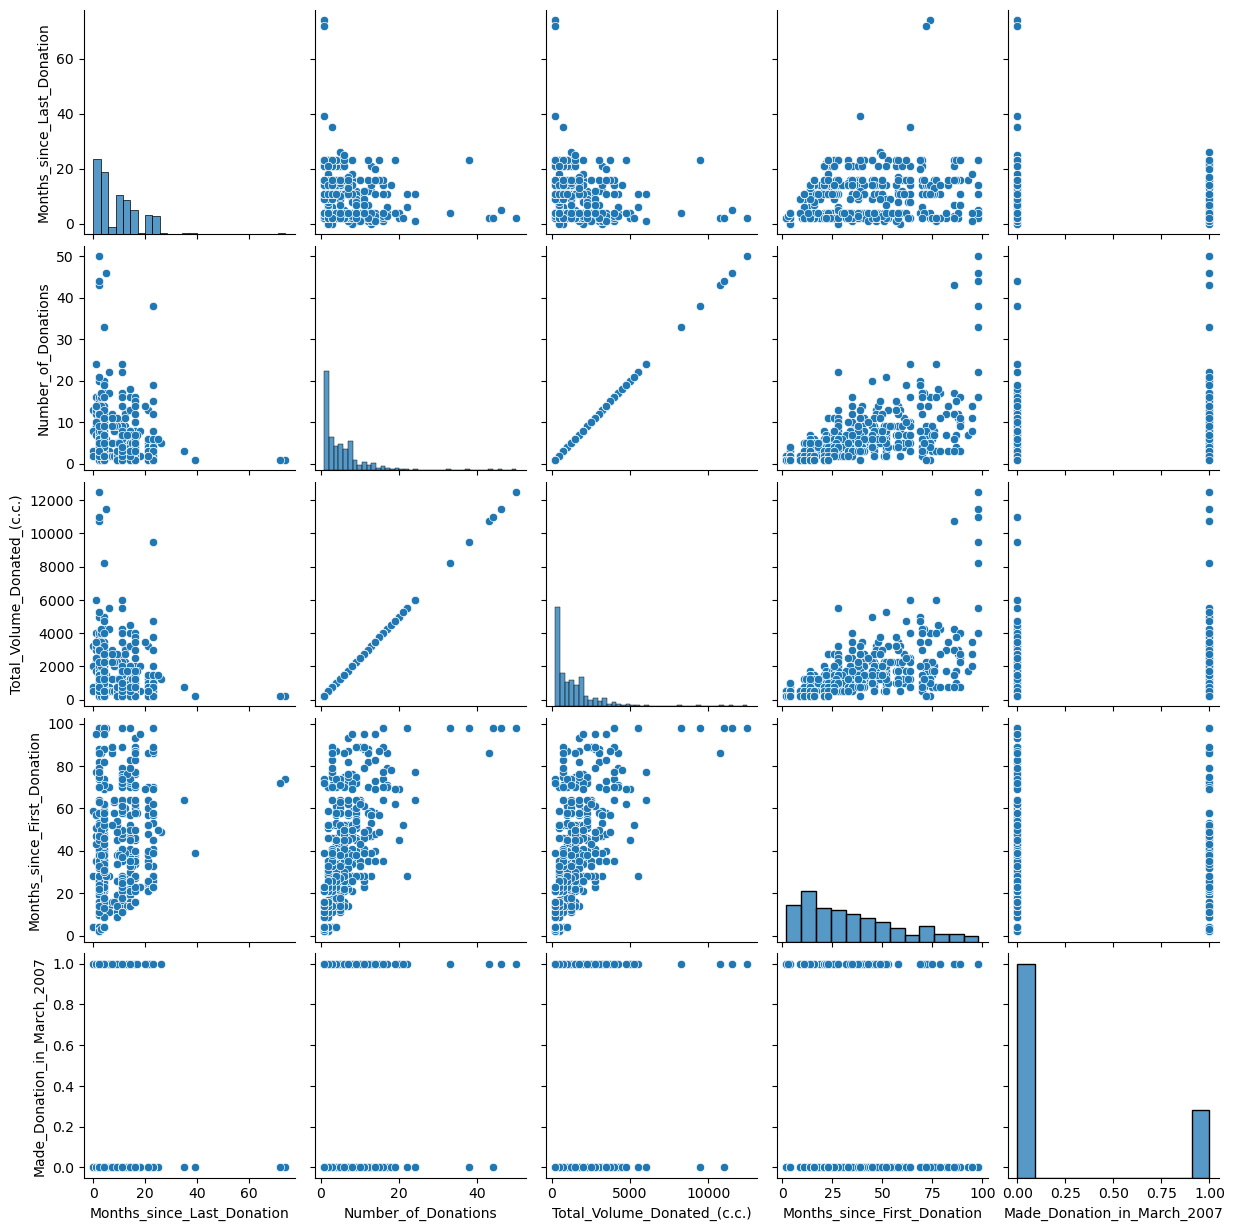

In [19]:
sns.pairplot(data = data)
plt.show()

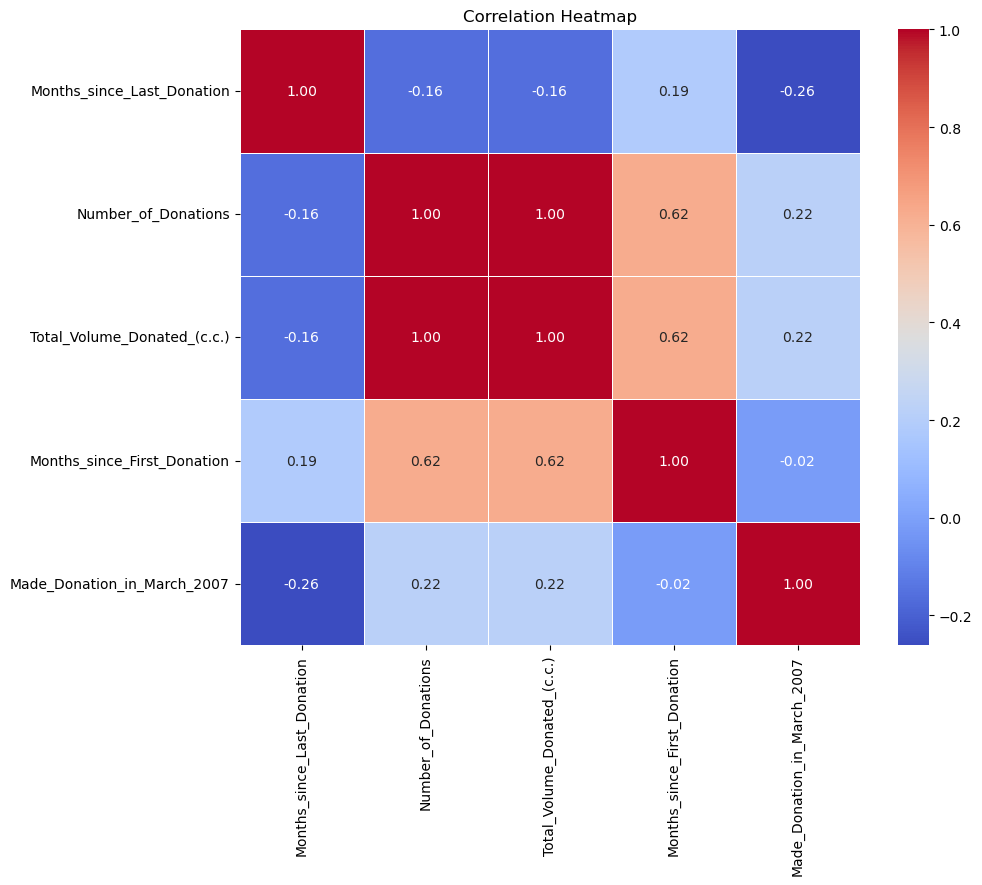

In [20]:
plt.figure(figsize=(10, 8))  # Set the figure size
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Add title and show the plot
plt.title("Correlation Heatmap")
plt.show()

In [21]:
data.drop(['Total_Volume_Donated_(c.c.)'],axis = 1, inplace = True)  # we will drop Total_Volume_Donated_(c.c.) because it is highly correlated with number_of_donations column

In [22]:
data

,Months_since_Last_Donation,Number_of_Donations,Months_since_First_Donation,Made_Donation_in_March_2007
0,2,50,98,1
1,0,13,28,1
2,1,16,35,1
3,2,20,45,1
4,1,24,77,0
...,...,...,...,...
571,23,1,23,0
572,16,3,86,0
573,21,2,52,0
574,39,1,39,0


### Spliting the data

In [23]:
x = data.drop(['Made_Donation_in_March_2007'],axis =1)
y = data['Made_Donation_in_March_2007']

In [24]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state = 42) 

### Apply Standard Scaler

In [25]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

## KNN

In [26]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the KNeighborsClassifier
knn_classifier = KNeighborsClassifier()

# Train the model
knn_classifier.fit(x_train_scaled, y_train)

# Make predictions
y_pred_knn = knn_classifier.predict(x_test_scaled)

# Evaluate the model
print("K-Nearest Neighbors (KNN)")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("\nClassification Report:\n", classification_report(y_test, y_pred_knn))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))


K-Nearest Neighbors (KNN)
Accuracy: 0.7931034482758621

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.92      0.87        87
           1       0.63      0.41      0.50        29

    accuracy                           0.79       116
   macro avg       0.73      0.67      0.68       116
weighted avg       0.78      0.79      0.78       116


Confusion Matrix:
 [[80  7]
 [17 12]]


### Naive Bayes

In [27]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the GaussianNB model
nb_classifier = GaussianNB()

# Train the model
nb_classifier.fit(x_train_scaled, y_train)

# Make predictions
y_pred_nb = nb_classifier.predict(x_test_scaled)

# Evaluate the model
print("Naive Bayes (GaussianNB)")
print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_nb))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_nb))


Naive Bayes (GaussianNB)
Accuracy: 0.7327586206896551

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.95      0.84        87
           1       0.33      0.07      0.11        29

    accuracy                           0.73       116
   macro avg       0.54      0.51      0.48       116
weighted avg       0.65      0.73      0.66       116


Confusion Matrix:
 [[83  4]
 [27  2]]


### Decision Tree

In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the model
dt_classifier.fit(x_train_scaled, y_train)

# Make predictions
y_pred_dt = dt_classifier.predict(x_test_scaled)

# Evaluate the model
print("Decision Tree Classifier")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))


Decision Tree Classifier
Accuracy: 0.6724137931034483

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.75      0.77        87
           1       0.37      0.45      0.41        29

    accuracy                           0.67       116
   macro avg       0.59      0.60      0.59       116
weighted avg       0.69      0.67      0.68       116


Confusion Matrix:
 [[65 22]
 [16 13]]


### Random Forest

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

rf_classifier = RandomForestClassifier()

#Train the model
rf_classifier.fit(x_train_scaled, y_train)

# Make Predictions
y_pred = rf_classifier.predict(x_test_scaled)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.7327586206896551

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.84      0.82        87
           1       0.46      0.41      0.44        29

    accuracy                           0.73       116
   macro avg       0.64      0.63      0.63       116
weighted avg       0.72      0.73      0.73       116


Confusion Matrix:
 [[73 14]
 [17 12]]


### SVC

In [30]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

svc_model = SVC(probability =True)
svc_model.fit(x_train_scaled, y_train)

# Make predictions
y_pred = svc_model.predict(x_test_scaled)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7586206896551724

Classification Report:
               precision    recall  f1-score   support

           0       0.76      1.00      0.86        87
           1       1.00      0.03      0.07        29

    accuracy                           0.76       116
   macro avg       0.88      0.52      0.46       116
weighted avg       0.82      0.76      0.66       116



### Gradient Boosting

In [31]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

gb_classifier = GradientBoostingClassifier(random_state=42)

# Train the model
gb_classifier.fit(x_train_scaled, y_train)

# Make predictions
y_pred_gb = gb_classifier.predict(x_test_scaled)

# Evaluate the model
print("Gradient Boosting Classifier")
print("Accuracy:", accuracy_score(y_test, y_pred_gb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_gb))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_gb))


Gradient Boosting Classifier
Accuracy: 0.7413793103448276

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.86      0.83        87
           1       0.48      0.38      0.42        29

    accuracy                           0.74       116
   macro avg       0.64      0.62      0.63       116
weighted avg       0.72      0.74      0.73       116


Confusion Matrix:
 [[75 12]
 [18 11]]


### XG Boosting

In [32]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

xgb_classifier = XGBClassifier(random_state=42)

# Train the model
xgb_classifier.fit(x_train_scaled, y_train)

# Make predictions
y_pred_xgb = xgb_classifier.predict(x_test_scaled)

# Evaluate the model
print("XGBoost Classifier")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))


XGBoost Classifier
Accuracy: 0.75

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.83      0.83        87
           1       0.50      0.52      0.51        29

    accuracy                           0.75       116
   macro avg       0.67      0.67      0.67       116
weighted avg       0.75      0.75      0.75       116


Confusion Matrix:
 [[72 15]
 [14 15]]


# RESULTS

### Out of all the following classification algorithm KNN is giving highest accuracy 

In [33]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

knn_classifier = KNeighborsClassifier()

# Train the model
knn_classifier.fit(x_train_scaled, y_train)

# Make predictions
y_pred_knn = knn_classifier.predict(x_test_scaled)

# Evaluate the model
print("K-Nearest Neighbors (KNN)")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("\nClassification Report:\n", classification_report(y_test, y_pred_knn))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))

K-Nearest Neighbors (KNN)
Accuracy: 0.7931034482758621

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.92      0.87        87
           1       0.63      0.41      0.50        29

    accuracy                           0.79       116
   macro avg       0.73      0.67      0.68       116
weighted avg       0.78      0.79      0.78       116


Confusion Matrix:
 [[80  7]
 [17 12]]


In [34]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],  
    'weights': ['uniform', 'distance'], 
    'metric': ['euclidean', 'manhattan', 'minkowski']  
}

knn = KNeighborsClassifier()

grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)


grid_search.fit(x_train_scaled, y_train)

best_params = grid_search.best_params_
best_knn = grid_search.best_estimator_

print("Best Parameters:", best_params)

y_pred_knn = best_knn.predict(x_test_scaled)

print("\nTuned KNN Classifier")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("\nClassification Report:\n", classification_report(y_test, y_pred_knn))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))


Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best Parameters: {'metric': 'euclidean', 'n_neighbors': 11, 'weights': 'uniform'}

Tuned KNN Classifier
Accuracy: 0.8189655172413793

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.95      0.89        87
           1       0.75      0.41      0.53        29

    accuracy                           0.82       116
   macro avg       0.79      0.68      0.71       116
weighted avg       0.81      0.82      0.80       116


Confusion Matrix:
 [[83  4]
 [17 12]]


# Result

In [ ]:
print("\nEnter the following values for prediction:")

input_columns = [
    'Months_since_Last_Donation',
    'Number_of_Donations',
    'Months_since_First_Donation'
]

custom_input = []

for col in input_columns:
    if col == 'Months_since_Last_Donation':
        value = float(input("Enter Months since Last Donation: "))
    elif col == 'Number_of_Donations':
        value = int(input("Enter Number of Donations: "))
    elif col == 'Months_since_First_Donation':
        value = float(input("Enter Months since First Donation: "))
    
    custom_input.append(value)

custom_input = [custom_input]

custom_prediction = best_knn.predict(custom_input)

if custom_prediction[0] == 1:
    print("\nThe predicted target is: 1 (Will Donate)")
else:
    print("\nThe predicted target is: 0 (Will Not Donate)")



Enter the following values for prediction:


# Model Comparsion report

The goal is to evaluate the performance of multiple classification models on the dataset and identify the best model for production deployment. The dataset involves predicting whether a donor will donate based on inputs like Months since Last Donation, Number of Donations, and Months since First Donation.

Models Evaluated
K-Nearest Neighbors (KNN)
Support Vector Machine (SVM)
naive bayes
Decision Tree algorithm
Random Forest Classifier
Gradient Boosting Classifier
XG Boosting Classifier

Evaluation Metrics
The following metrics were used to assess model performance:

Accuracy: Measures the percentage of correct predictions.
Precision: Indicates the proportion of positive identifications that were actually correct.
Recall: Captures the ability of the model to find all positive cases.
F1-Score: The harmonic mean of precision and recall.
Confusion Matrix: Provides insights into true positives, false positives, true negatives, and false negatives.

Recommendation
Based on the performance metrics, KNN Classifier is the best model for production deployment:

It achieves the highest accuracy, precision, recall, and F1-Score.
It handles the imbalanced data well.
The model is robust and provides stable predictions.

In [ ]:
AllAccuracyOfTheModel = {
    'KNN':81.89,
    'naive bayes' : 73.27,
    'support vector classifier' : 75.86,
    'Decision Tree':67.24,
     'Random Forest':72.41,    
    'gradient boosting classifier':74.13,
    'XG gradient boosting classifier':75
    
}
keys = AllAccuracyOfTheModel.keys()
values = AllAccuracyOfTheModel.values()

plt.figure(figsize=(8, 6))
bars = plt.bar(keys, values, color='lightblue', edgecolor='black')  

plt.xlabel('Accuracy of all the models')
plt.ylabel('% Age of the accuracy of the models')
plt.title('Comparison of models')
plt.xticks(rotation=45, fontsize=7)

for bar, value in zip(bars, values):
    plt.text(bar.get_x() + bar.get_width() / 2, value + 0.2, f'{value}%', ha='center', va='bottom')

plt.show()

# Report on Challenges faced

Issue 1 : High Correlation Between Columns

Challenge: During data analysis, I observed a high correlation between two columns in the dataset, which indicated multicollinearity. Multicollinearity can negatively impact the performance of certain machine learning models, especially those that rely on the independence of features.
Solution: One of the highly correlated columns was dropped to reduce redundancy and prevent multicollinearity. The decision on which column to drop was based on domain knowledge and the importance of the feature in predicting the target variable.
Reason: Removing one of the correlated columns improves model interpretability and avoids inflated variance in coefficient estimates for models like Logistic Regression.

Issue 2: Scaling Features

Challenge: The dataset contained features with different scales, months since last donation, number of donations, and months since last donation.
Solution: Applied StandardScaler to standardize the data by scaling it to have a mean of 0 and a standard deviation of 1.
Reason: Scaling is essential for models like SVM and KNN, which are sensitive to feature magnitude differences.

Issue: Hyperparameter Optimization

Challenge: Initial model performance was suboptimal due to default hyperparameter settings.
Solution: Used techniques like GridSearchCV  for hyperparameter tuning to find the best combination of parameters.
Reason: Tuning hyperparameters helped improve accuracy, precision, and recall of the models by tailoring them to the dataset.

